# Model Creation - Logistic Regression
This notebook creates the logistic regression model that classify the abstracts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

Import data

In [2]:
data = pd.read_pickle('preprocessed_abstracts.pkl')
data.iloc[0]['abstract']


'andreas ekberg  born 2 january 1985  swedish football referee  ekberg currently resides malmö  he full international referee fifa since 2013  he became professional referee 2004 allsvenskan referee since 2009  ekberg refereed 74 matches allsvenskan  55 matches superettan 14 international matches 2014 '

Divide into training and test data. 80% train 20% test.

In [4]:
x = data[['page','abstract']]
y = data['label']
classes = y.unique()
classes.sort()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=1)

Create a pipeline of constructing a count matrix, followed by a tf-idf matrix, and finally the model.

In [5]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(),),
              ])

In [6]:
nb.fit(train_x['abstract'], train_y)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [7]:
predictions = nb.predict(test_x['abstract'])

In [8]:
print('accuracy %s' % accuracy_score(predictions, test_y))
print(classification_report(test_y, predictions))


accuracy 0.974516942033044
             precision    recall  f1-score   support

       Bird       0.99      0.98      0.98      2026
 Board Game       0.98      0.69      0.81       114
       Book       0.97      0.97      0.97      1112
       City       0.99      1.00      0.99      2084
    Company       0.97      0.99      0.98      1878
    Country       1.00      0.59      0.74        58
       Fish       0.98      0.98      0.98      1929
     Mammal       0.98      0.97      0.97      2004
     Person       0.93      0.96      0.94      1985
     Planet       1.00      0.96      0.98       880
      Plant       0.97      0.96      0.97      1982
 University       0.99      0.99      0.99      1212
 Video Game       0.95      0.98      0.96       591

avg / total       0.97      0.97      0.97     17855



Construct a confusion matrix

In [19]:
cm = confusion_matrix(test_y, predictions)
for r in range(len(cm)):
    print("\multicolumn{1}{|c|}{} &",classes[r], end="")
    for e in range(len(cm[r])):
        print("&", end ="") 
        if r == e:
            print("\cellcolor{lightgray}", end ="") 
        print(cm[r][e], end ="") 
    print("\\\ \cline{2-15} ")
print(cm)

\multicolumn{1}{|c|}{} & Bird&\cellcolor{lightgray}1978&0&1&1&2&0&9&14&16&0&5&0&0\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Board Game&0&\cellcolor{lightgray}79&0&0&1&0&0&0&8&0&1&0&25\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Book&1&0&\cellcolor{lightgray}1082&0&3&0&0&1&22&0&1&1&1\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & City&1&0&0&\cellcolor{lightgray}2080&0&0&1&0&1&0&0&1&0\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Company&0&0&0&1&\cellcolor{lightgray}1866&0&0&1&2&0&3&3&2\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Country&0&0&0&10&4&\cellcolor{lightgray}34&0&1&9&0&0&0&0\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Fish&1&1&2&1&2&0&\cellcolor{lightgray}1887&7&10&0&17&0&1\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Mammal&7&0&1&2&3&0&8&\cellcolor{lightgray}1943&28&0&11&0&1\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Person&1&0&20&2&17&0&1&11&\cellcolor{lightgray}1910&2&12&7&2\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Planet&0&0&2&1&2&0&1&1&20&\cellcolor{lightgray}849&4&0&0\\ \cline{2-15} 
\multicolumn{

Show faulty predictions

In [22]:
i = -1
for idx, row in test_x.iterrows():
    i += 1
    if test_y.iloc[i] != predictions[i]:
        print('Prediction:',predictions[i],', True:',test_y.iloc[i],', Page:',row['page'])
        print('Abstract:',row['abstract'])

Prediction: Bird , True: Mammal , Page: http://dbpedia.org/resource/Supposititious_children
Abstract: supposititious children fraudulent offspring  these arose heir required suitable baby might procured passed genuine  this common concern classical period dealers supposititious children would provide fee  laws passed counter found illegitimate might sold slavery 
Prediction: Person , True: Plant , Page: http://dbpedia.org/resource/Psiadia
Abstract: psiadia genus asian african plants aster tribe within sunflower family  species 1   psiadia agathaeoides 2   psiadia altissima 3   psiadia amygdalina 4   psiadia anchusaefolia 5   psiadia angustifolia 6   psiadia argentea 7   psiadia aspera 8   psiadia balsamica 9   psiadia cacuminum 10   psiadia callocephala 11   psiadia cataractae 12   psiadia ceylanica 13   psiadia coarctata 14   psiadia coronopus 15   psiadia dentata 16   psiadia dodonaeifolia 17   psiadia dracaenifolia 18   psiadia glutinosa 19   psiadia grandidentata 20   psiadia hende

Prediction: Plant , True: Person , Page: http://dbpedia.org/resource/Aristid_Lindenmayer
Abstract: aristid lindenmayer  17 november 1925  30 october 1989  hungarian biologist  in 1968 developed type formal languages today called lsystems lindenmayer systems  using systems lindenmayer modelled behaviour cells plants  lsystems nowadays also used model whole plants  lindenmayer worked yeast filamentous fungi studied growth patterns various types algae  bluegreen bacteria anabaena catenula  originally lsystems devised provide formal description development simple multicellular organisms  illustrate neighbourhood relationships plant cells  later  system extended describe higher plants complex branching structures 
Prediction: Person , True: Planet , Page: http://dbpedia.org/resource/Swashbuckler
Abstract: a swashbuckler heroic archetype european adventure literature typified use sword chivalric ideals  the archetype also became common film genre 
Prediction: Person , True: Plant , Page: htt

Prediction: Company , True: Person , Page: http://dbpedia.org/resource/David_Bradley_(plowman)
Abstract: david bradley  november 8  1811  february 19  1899   pioneer plowman   david bradley born groton  new york november 8  1811  after working brother  c c bradley  several years syracuse  relocated chicago 1835  initially employ jones  king  co helped build first foundry chicago  known  chicago furnace   from late 1830s 1850s david bradley farmed lake county  illinois  made bricks  later farm machinery  racine  wisconsin  lumberman michigan  in 1854  returned chicago purchased plow company brother law  later year partnered conrad furst create firm furst bradley  furst bradley eventually grew occupy entire city block fulton desplaines streets chicago  in 1884 david bradley sons purchased furst s share business  company renamed  david bradley manufacturing company   in 1895 company relocated north kankakee  50 miles south chicago   later renamed  bradley  illinois  honor man company  in 

Prediction: Plant , True: Fish , Page: http://dbpedia.org/resource/Tetronarce_macneilli
Abstract: tetronarce macneilli also known shortail torpedo species large electric ray  the taxonomy species long debated suggested synonymous torpedo fairchildi 
Prediction: Video Game , True: Board Game , Page: http://dbpedia.org/resource/Rumis
Abstract: rumis game optimal placement blocks various shapes within confined space  rumi means  stone  quechua  the theme artwork inspired inca architecture  rumis also published name blokus 3d 
Prediction: Plant , True: Bird , Page: http://dbpedia.org/resource/Spotted_thick-knee
Abstract: the spotted thickknee  burhinus capensis  also known spotted dikkop cape thickknee  stonecurlew family burhinidae  it native tropical regions central southern africa 
Prediction: Person , True: Planet , Page: http://dbpedia.org/resource/Wise_old_man
Abstract: the wise old man  also called senex  sage sophos  archetype described carl jung  well classic literary figure  may 

Prediction: University , True: Book , Page: http://dbpedia.org/resource/Students'_Guide_to_Colleges
Abstract: students  guide colleges series college guidebooks released penguin books  the first students  guide colleges featured time magazine  forbes  abc news  us news  world report 30 national radio programs  it became one top five bestselling college guidebooks turned series  released five annually updated editions  students  guide created jordan goldman colleen buyers 18 years old  in 2000  pair built website online survey asking college students tell truth colleges really like  in early example website going viral  hundreds thousands students visited 30000 current students weighed detailed responses  goldman buyers edited results 704page college guide profiling schools across america including explicit content  they signed literary agency janklow  nesbit associates manuscript purchased penguin books  second largest publisher world  chuck hughes  senior admissions officer harvard  s

Prediction: Person , True: Book , Page: http://dbpedia.org/resource/Lincoln's_Forgotten_Ally:_Judge_Advocate_General_Joseph_Holt_of_Kentucky
Abstract: lincoln s forgotten ally  judge advocate general joseph holt kentucky biography elizabeth d leonard joseph holt  member buchanan s administration judge advocate general united states army 
Prediction: Mammal , True: Person , Page: http://dbpedia.org/resource/Bula_(horse)
Abstract: bula  19651977  british national hunt horse two champion hurdles many top races hurdles later fences  he ran considered  golden period  two mile hurdlers 1970s  featured champions persian war  comedy of errors  night nurse  monksfield sea pigeon  bula  remarkably consistent  versatile durable jumper  known comefrombehind style 
Prediction: Mammal , True: Person , Page: http://dbpedia.org/resource/Adnan
Abstract: adnan  arabic  عدنان  traditional ancestor adnanite arabs northern  western central arabia  opposed qahtanite arabs southern arabia descend qahtan 
Pre

Prediction: Bird , True: Plant , Page: http://dbpedia.org/resource/Land_Rush_of_1889
Abstract: the oklahoma land rush 1889 first land rush unassigned lands  the area opened settlement included part presentday canadian  cleveland  kingfisher  logan  oklahoma  payne counties us state oklahoma  the land run started high noon april 22  1889  estimated 50000 people lined piece available two million acres  8000 km²   the unassigned lands considered best unoccupied public land united states  the indian appropriations act 1889 passed signed law amendment illinois representative william mckendree springer  authorized president benjamin harrison open two million acres  8000 km²  settlement  the homestead act 1862  signed president abraham lincoln  allowed legal settlers claim lots 160 acres  065 km2  size  provided settler lived land improved  settler could receive title land 
Prediction: Person , True: Board Game , Page: http://dbpedia.org/resource/Quarters_(game)
Abstract: quarters drinking ga

Prediction: Plant , True: Person , Page: http://dbpedia.org/resource/Dandy_loom
Abstract: a dandy loom hand loom  automatically ratchetted takeup beam  each time weaver moved sley beatup weft  rachet pawl mechanism advanced cloth roller  in 1802 william ratcliffe stockport patented dandy loom cast iron frame  it type dandy loom used small dandy loom shops 
Prediction: Fish , True: Person , Page: http://dbpedia.org/resource/Piranha
Abstract: a piranha piraña  pᵻˈrɑːnjə  pᵻˈrænjə  pᵻˈrɑːnə  portuguese   piˈɾɐɲɐ   spanish   piˈɾaɲa   member family characidae order characiformes  omnivorous freshwater fish inhabits south american rivers  in venezuela  called caribes  they known sharp teeth powerful jaws 
Prediction: Person , True: Company , Page: http://dbpedia.org/resource/Mosfilm
Abstract: mosfilm  russian  мосфильм  mosfil  pronounced  məsˈfʲilʲm   film studio often described largest oldest russian federation europe  its output includes widely acclaimed sovietera films  ranging works ta

Prediction: Plant , True: Mammal , Page: http://dbpedia.org/resource/Honey_possum
Abstract: the honey possum  tarsipes rostratus   also known native names tait noolbenger  tiny australian marsupial  it species genus tarsipes family tarsipedidae  many authorities believe sufficiently distinct properly raised separate superfamily within diprotodontia  perhaps even  it thought sole survivor otherwise longextinct marsupial group  it important pollinator plants banksia attenuata  banksia coccinea adenanthos cuneatus 
Prediction: Person , True: Plant , Page: http://dbpedia.org/resource/Fire_chief
Abstract: fire chief  chief fire officer england wales  fire master scotland  top executive rank commanding officer fire department  either elected appointed  responsible carrying daytoday tasks running firefighting organization  such tasks include supervising officers firefighters emergency scene recruiting  training  equipping respective duties  depending upon local needs organization  chief may a

Prediction: Fish , True: Bird , Page: http://dbpedia.org/resource/European_herring_gull
Abstract: the european herring gull  larus argentatus  large gull  26  66 cm  long   one best known gulls along shores western europe  abundant  it breeds across northern europe  western europe  central europe  eastern europe  scandinavia baltic states  some european herring gulls  especially resident colder areas  migrate south winter  many permanent residents  eg  british isles  iceland  north sea shores  european herring gulls varied diet  including fish  crustaceans dead animals well plants  while herring gull numbers appear harmed recent years  possibly fish population declines competition  proved able survive humanadapted areas often seen towns acting scavengers 
Prediction: Person , True: Fish , Page: http://dbpedia.org/resource/Flag_of_Akrotiri_and_Dhekelia
Abstract: akrotiri dhekelia flag result represented flag united kingdom  union jack  akrotiri dhekelia  officially sovereign base areas 

Precision score per class

In [25]:
precision = precision_score(test_y, predictions, average=None)
recall = recall_score(test_y, predictions, average=None)
f1 = f1_score(test_y, predictions, average=None)

Plot precision, recall, and F1-score

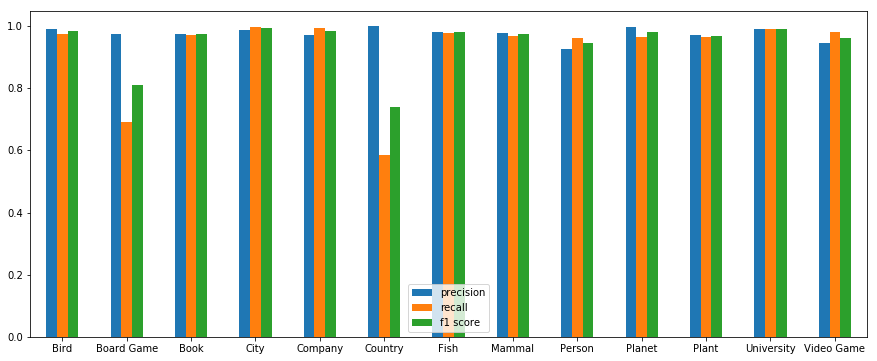

In [26]:
metrics = pd.DataFrame(np.c_[precision,recall,f1], index=classes)
metrics.columns = ['precision', 'recall', 'f1 score']
metrics.plot.bar(rot=0,figsize=(15, 6))
plt.show()